Trying to see if it is possible to get a more granular view of the frequency of evictions. The idea here was a stacked bar graph to show how evictions have been steadily declining over time, and to illustrate the break up of evictions into residential and commercial.

In [95]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import os
from sodapy import Socrata

In [96]:
socrata_domain = 'data.cityofnewyork.us'
socrata_dataset_identifier = '6z8x-wfk4'
socrata_token = None

In [97]:
client = Socrata(socrata_domain, socrata_token)
print("Domain: {domain:}\nSession: {session:}\nURI Prefix: {uri_prefix:}".format(**client.__dict__))

Domain: data.cityofnewyork.us
Session: <requests.sessions.Session object at 0x0000023C123F9A48>
URI Prefix: https://


In [98]:
results = client.get(socrata_dataset_identifier)
df = pd.DataFrame.from_dict(results)
display(df.head())
print(df.size)

,court_index_number,docket_number,eviction_address,eviction_apt_num,executed_date,marshal_first_name,marshal_last_name,residential_commercial_ind,borough,eviction_zip
0,41791/18A,485221,651 SOUTHERN BOULEVA RD,6-D,2019-02-22T00:00:00.000,Danny,Weinheim,Residential,BRONX,10455
1,76611/17,17025,37-60 88TH STREET,1R,2018-06-11T00:00:00.000,Edward,Guida,Residential,QUEENS,11372
2,63187/17,076932,655 FOX STREET,4F,2018-03-27T00:00:00.000,Justin,Grossman,Residential,BRONX,10455
3,66239/17,6585,443 EAST 88TH STREET,19,2017-12-12T00:00:00.000,Robert,Renzulli,Residential,MANHATTAN,10128
4,R 50928/17,069226,1020 BAY STREET LOWER FRONT ENTRANCE,NaN,2018-02-13T00:00:00.000,Steven,Powell,Residential,STATEN ISLAND,10305


10000


In [99]:
df1=df.loc[df['eviction_zip'].isin(['10025', '10027', '10031'])]
display(df1.head(120))
print(df1.size)

,court_index_number,docket_number,eviction_address,eviction_apt_num,executed_date,marshal_first_name,marshal_last_name,residential_commercial_ind,borough,eviction_zip
53,60296/17,073715,135 WEST 95TH STREET,3,2018-05-15T00:00:00.000,Justin,Grossman,Residential,MANHATTAN,10025
100,65101/19,12085,117 W 129TH STREET,6C,2019-11-12T00:00:00.000,Robert,Renzulli,Residential,MANHATTAN,10027
169,12675/18,354003,75 LASALLE STREET,7D,2020-02-10T00:00:00.000,Thomas,Bia,Residential,MANHATTAN,10027
259,60331/18,081442,249 WEST 109TH ST,3B,2018-07-17T00:00:00.000,Justin,Grossman,Residential,MANHATTAN,10025
267,79474/18,090523,3610 BROADWAY,DUMPLING HOUSE,2019-02-14T00:00:00.000,Justin,Grossman,Commercial,MANHATTAN,10031
276,73408/15,324805,853 ST NICHOLAS AVENUE,603,2017-03-31T00:00:00.000,John,Villanueva,Residential,MANHATTAN,10031
302,N069792/16,388366,100 WEST 94TH STREET,3A,2018-07-12T00:00:00.000,Richard,McCoy,Residential,MANHATTAN,10025
400,52478/17,469293,707 ST. NICHOLAS AVE,4A,2017-05-31T00:00:00.000,Danny,Weinheim,Residential,MANHATTAN,10031
462,53436/18,343526,127 WEST 96TH STREET,15C,2018-07-16T00:00:00.000,Thomas,Bia,Residential,MANHATTAN,10025
578,N64895/17,080612,698 WEST END AVENUE,7B,2017-08-16T00:00:00.000,Ileana,Rivera,Residential,MANHATTAN,10025


240


The same problem as last time - Socrata is capping the amount of data that I can access... 
What I can do with the yearly data:

In [100]:
x=["2017","2018","2019"]
y=[483,439,305]

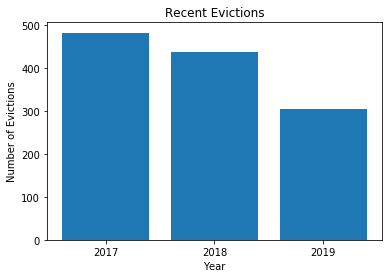

In [101]:
plt.bar(x,y)
plt.xlabel('Year')
plt.ylabel("Number of Evictions")
plt.title('Recent Evictions')
plt.show()

Forget about Socrata, just using the downloaded csv now.

In [102]:
df = pd.read_csv("Evictions.csv") 

In [103]:
display(df.head(20))
print(df.size)

,COURT_INDEX_NUMBER,DOCKET_NUMBER,EVICTION_ADDRESS,EVICTION_APT_NUM,EXECUTED_DATE,MARSHAL_FIRST_NAME,MARSHAL_LAST_NAME,RESIDENTIAL_COMMERCIAL_IND,BOROUGH,EVICTION_ZIP
0,41791/18A,485221,651 SOUTHERN BOULEVA RD,6-D,02/22/2019,Danny,Weinheim,Residential,BRONX,10455
1,76611/17,17025,37-60 88TH STREET,1R,06/11/2018,Edward,Guida,Residential,QUEENS,11372
2,63187/17,76932,655 FOX STREET,4F,03/27/2018,Justin,Grossman,Residential,BRONX,10455
3,66239/17,6585,443 EAST 88TH STREET,19,12/12/2017,Robert,Renzulli,Residential,MANHATTAN,10128
4,R 50928/17,69226,1020 BAY STREET LOWER FRONT ENTRANCE,NaN,02/13/2018,Steven,Powell,Residential,STATEN ISLAND,10305
5,75790/17,203960,104-60 QUEENS BLVD,03W,01/18/2018,Richard,Capuano,Residential,QUEENS,11375
6,H251319/18,109409,17 WEST 137TH STREET,4A,12/10/2018,Darlene,Barone,Residential,MANHATTAN,10037
7,K60900/19,114251,1439 OCEAN AVENUE,BASEMENT APT,07/09/2019,Darlene,Barone,Residential,BROOKLYN,11230
8,K62974/17,79050,266 PROSPECT PARK WE ST,3R,07/03/2017,Ileana,Rivera,Residential,BROOKLYN,11215
9,53418/16,82093,1720 WOODBINE STREET,2R,06/22/2018,Henry,Daley,Residential,QUEENS,11385


663230


In [104]:
sorted_data=[]
for x in range(0,8):
    dummy1 = []
    for x in range(0,12):
        dummy1.append(0)
    sorted_data.append(dummy1)

In [105]:
df1=df.loc[df['EVICTION_ZIP'].isin(['10025', '10027', '10031'])]
display(df1.head(120))
print(df1.size)

,COURT_INDEX_NUMBER,DOCKET_NUMBER,EVICTION_ADDRESS,EVICTION_APT_NUM,EXECUTED_DATE,MARSHAL_FIRST_NAME,MARSHAL_LAST_NAME,RESIDENTIAL_COMMERCIAL_IND,BOROUGH,EVICTION_ZIP
53,60296/17,73715,135 WEST 95TH STREET,3,05/15/2018,Justin,Grossman,Residential,MANHATTAN,10025
100,65101/19,12085,117 W 129TH STREET,6C,11/12/2019,Robert,Renzulli,Residential,MANHATTAN,10027
169,12675/18,354003,75 LASALLE STREET,7D,02/10/2020,Thomas,Bia,Residential,MANHATTAN,10027
259,60331/18,81442,249 WEST 109TH ST,3B,07/17/2018,Justin,Grossman,Residential,MANHATTAN,10025
267,79474/18,90523,3610 BROADWAY,DUMPLING HOUSE,02/14/2019,Justin,Grossman,Commercial,MANHATTAN,10031
...,...,...,...,...,...,...,...,...,...,...
5897,85289/16,325500,20-22 WEST 129TH STREET,6B,06/27/2017,John,Villanueva,Residential,MANHATTAN,10027
5903,60384/17,1335,335 EDGECOMBE AVE,2B,08/16/2017,Salavatore,Giglio,Residential,MANHATTAN,10031
5910,N66379/19,100205,50 WEST 93RD STREET,5B,10/31/2019,Ileana,Rivera,Residential,MANHATTAN,10025
5952,N63166/19,98700,50 WEST 97TH STREET,SUITES 1E & 1I,08/21/2019,Ileana,Rivera,Commercial,MANHATTAN,10025


12790


In [106]:
df1 = df1.reset_index(drop=True)
display(df1)

,COURT_INDEX_NUMBER,DOCKET_NUMBER,EVICTION_ADDRESS,EVICTION_APT_NUM,EXECUTED_DATE,MARSHAL_FIRST_NAME,MARSHAL_LAST_NAME,RESIDENTIAL_COMMERCIAL_IND,BOROUGH,EVICTION_ZIP
0,60296/17,73715,135 WEST 95TH STREET,3,05/15/2018,Justin,Grossman,Residential,MANHATTAN,10025
1,65101/19,12085,117 W 129TH STREET,6C,11/12/2019,Robert,Renzulli,Residential,MANHATTAN,10027
2,12675/18,354003,75 LASALLE STREET,7D,02/10/2020,Thomas,Bia,Residential,MANHATTAN,10027
3,60331/18,81442,249 WEST 109TH ST,3B,07/17/2018,Justin,Grossman,Residential,MANHATTAN,10025
4,79474/18,90523,3610 BROADWAY,DUMPLING HOUSE,02/14/2019,Justin,Grossman,Commercial,MANHATTAN,10031
...,...,...,...,...,...,...,...,...,...,...
1274,66944/17,472883,410 ST NICHOLAS AVEN UE,7H,10/23/2017,Danny,Weinheim,Residential,MANHATTAN,10027
1275,N79885/16,94489,614 WEST 136 STREET,2,03/06/2017,Darlene,Barone,Residential,MANHATTAN,10031
1276,53416/19,92678,677 AMSTERDAM AVENUE,STORE NUMBER 8(CONSI,05/02/2019,Justin,Grossman,Commercial,MANHATTAN,10025
1277,73496/18,490373,381 EDGECOMBE AVENUE,2B,04/22/2019,Danny,Weinheim,Residential,MANHATTAN,10031


In [107]:
test=df1.loc[0,"EXECUTED_DATE"]
print(test)
print(int(test[6:])-2013)
print(int(test[:2])-1)
sorted_data[int(test[6:])-2013][int(test[:2])-1]

05/15/2018
5
4


0

In [108]:
for x in range(len(df1)):
    s=df1.loc[x,"EXECUTED_DATE"]
    print(x, " ", int(s[6:])-2013, " ", int(s[:2])-1)
    sorted_data[int(s[6:])-2013][int(s[:2])-1] += 1

0   5   4
1   6   10
2   7   1
3   5   6
4   6   1
5   4   2
6   5   6
7   4   4
8   5   6
9   4   7
10   4   1
11   5   0
12   4   3
13   6   10
14   6   8
15   4   11
16   4   5
17   6   3
18   4   5
19   6   2
20   4   5
21   6   7
22   5   4
23   4   7
24   6   5
25   4   11
26   4   9
27   4   3
28   4   0
29   5   5
30   4   10
31   4   0
32   6   2
33   4   0
34   5   8
35   4   9
36   5   5
37   5   10
38   5   7
39   5   5
40   7   0
41   6   6
42   5   7
43   7   0
44   6   7
45   4   1
46   4   1
47   5   2
48   6   1
49   5   9
50   4   6
51   6   9
52   5   2
53   4   6
54   5   0
55   5   8
56   4   9
57   6   10
58   6   5
59   4   3
60   4   9
61   5   5
62   6   1
63   4   8
64   6   8
65   6   5
66   4   10
67   4   1
68   5   0
69   4   2
70   4   10
71   5   6
72   5   4
73   5   1
74   6   5
75   4   0
76   4   8
77   6   6
78   4   1
79   5   3
80   5   2
81   4   7
82   4   5
83   5   10
84   5   5
85   5   0
86   4   1
87   4   8
88   4   0
89   6   2
90   6   3

873   5   11
874   4   11
875   4   6
876   4   8
877   4   2
878   7   0
879   5   0
880   4   3
881   6   5
882   6   0
883   5   7
884   4   5
885   6   5
886   4   9
887   4   3
888   5   7
889   7   0
890   4   9
891   6   5
892   5   1
893   6   0
894   5   9
895   4   0
896   6   3
897   6   10
898   6   6
899   6   11
900   4   11
901   4   3
902   4   5
903   6   5
904   4   0
905   5   0
906   6   0
907   6   0
908   5   5
909   5   6
910   5   2
911   6   2
912   5   9
913   5   4
914   4   2
915   5   10
916   4   4
917   4   8
918   5   4
919   5   8
920   6   0
921   6   3
922   5   1
923   7   1
924   5   1
925   5   1
926   4   3
927   5   7
928   4   1
929   6   3
930   4   8
931   5   7
932   5   5
933   6   3
934   5   4
935   5   2
936   5   7
937   4   8
938   6   3
939   5   7
940   6   6
941   4   9
942   5   3
943   4   5
944   5   1
945   5   9
946   4   0
947   4   7
948   4   9
949   6   0
950   4   10
951   4   8
952   5   4
953   5   4
954   5   5
955   4  

In [109]:
display(sorted_data)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [44, 39, 38, 63, 41, 54, 30, 44, 34, 44, 31, 21],
 [49, 37, 37, 33, 50, 48, 47, 39, 33, 23, 24, 19],
 [30, 30, 26, 36, 26, 34, 21, 28, 14, 29, 19, 12],
 [22, 16, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [110]:
bars1 = [[44, 39, 38, 63, 41, 54, 30, 44, 34, 44, 31, 21],
               [49, 37, 37, 33, 50, 48, 47, 39, 33, 23, 24, 19],
               [30, 30, 26, 36, 26, 34, 21, 28, 14, 29, 19, 12],
               [22, 16, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
bars2=[44, 39, 38, 63, 41, 54, 30, 44, 34, 44, 31, 21, 49, 37, 37, 33, 50, 48, 47, 39, 33, 23, 24, 19, 
       30, 30, 26, 36, 26, 34, 21, 28, 14, 29, 19, 12, 22, 16, 14]

In [142]:
movingaverages = []
n=10
for x in range(len(bars2)):
    if x<=n and 3<=x:
        dummy2 = 0
        for y in range(x):
            dummy2 += bars2[y]
        movingaverages.append(float(dummy2)/float(x))
    elif x<=3:
        movingaverages.append(bars2[x])
    elif x>=n:
        dummy2 = 0
        for y in range(x-n,x):
            dummy2 += bars2[y]
        movingaverages.append(float(dummy2)/n)

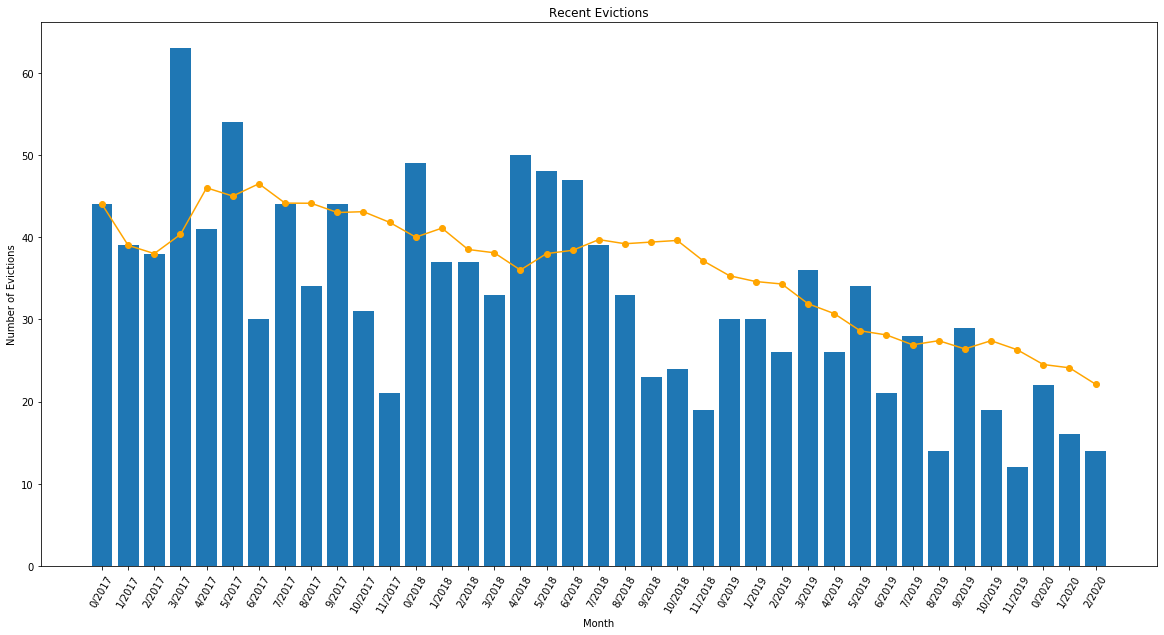

In [145]:
x = []
for r in range(0,12):
    x.append(str(r)+"/2017")
for r in range(0,12):
    x.append(str(r)+"/2018")
for r in range(0,12):
    x.append(str(r)+"/2019")
for r in range(0,3):
    x.append((str(r)+"/2020"))
y=bars2
plt.figure(figsize=(20,10))
plt.bar(x,y)
plt.xticks(rotation=60)
plt.xlabel('Month')
plt.ylabel("Number of Evictions")
plt.title('Recent Evictions')
plt.plot(x,movingaverages, '-o', color='orange')
plt.show()

In [146]:
plt.savefig('evictionsdecrease.pdf')

<Figure size 432x288 with 0 Axes>

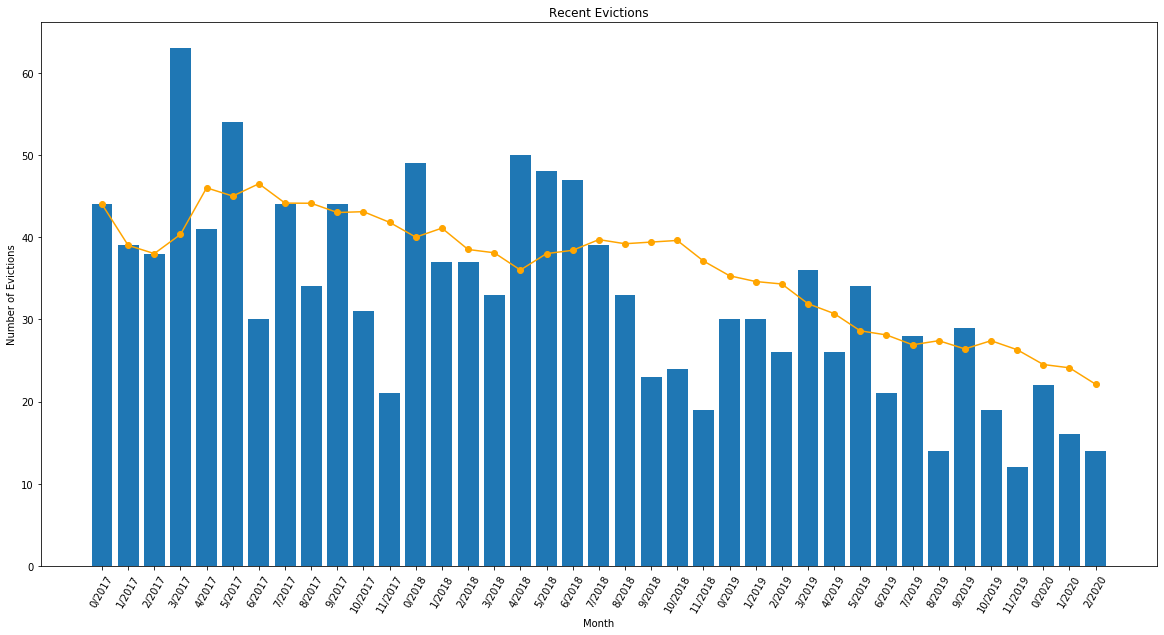

ValueError: No figure None

In [147]:
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages(r'C:\Users\prana\Desktop\evictionsdecrease.pdf') as export_pdf:
    plt.figure(figsize=(20,10))
    plt.bar(x,y)
    plt.xticks(rotation=60)
    plt.xlabel('Month')
    plt.ylabel("Number of Evictions")
    plt.title('Recent Evictions')
    plt.plot(x,movingaverages, '-o', color='orange')
    export_pdf.savefig()
    plt.close()